In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from scipy.stats import uniform
from scipy.stats import kstest

In [3]:
from sympy.ntheory import totient
from sympy import isprime, primerange


In [6]:
# my own code
from conversion_utils import get_base_10_representation
from transform import get_counts_dataframe

In [7]:
old_matrix, new_matrix = get_base_10_representation()

In [8]:
new_matrix

array([[203., 231., 167., 186.,  97., 237., 126., 183.],
       [ 92., 249., 156., 222., 247.,   4., 183., 212.],
       [121., 202.,  15.,  33., 102., 137.,  59.,  87.],
       [109., 198., 173.,  25., 150.,  66., 141., 133.],
       [115., 114., 197.,  39.,  54.,  80., 133.,   5.],
       [ 80.,  84.,  28.,  73., 230.,  81., 199.,  76.],
       [253.,  16.,  21.,  59.,  86., 171., 156.,  80.],
       [254., 118., 146.,  69., 106., 196., 124.,  51.],
       [122., 255.,  25., 192., 199.,  73., 169., 108.],
       [164.,  79., 205., 177., 114., 144.,  46.,  82.],
       [142.,  58., 201., 193., 173.,  28., 111.,  65.],
       [211., 220., 198.,  49., 236.,  84.,  56.,  35.],
       [222., 150.,  72.,  34.,  83., 229.,  32., 206.],
       [122.,  63.,  31., 218.,  14., 184.,  32., 115.],
       [ 73., 143., 197., 247.,  54., 171.,  35., 184.],
       [ 42., 237.,  86.,  54.,  13.,  20., 163., 193.],
       [201., 179.,  86., 120., 169., 141.,  72., 171.],
       [ 10., 129., 233.,  13.,

In [9]:
flattened=new_matrix.flatten()

In [10]:
results_df=get_counts_dataframe(flattened)

<Axes: xlabel='values'>

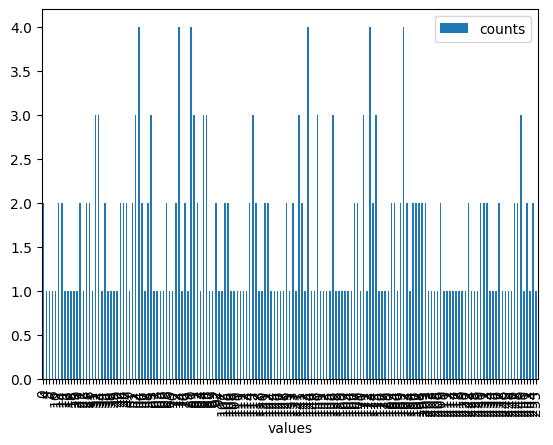

In [11]:
results_df.plot.bar(x='values', y='counts')

In [12]:
# try stats random uniform now

In [13]:
simulated = uniform.rvs(loc=0, scale=255, size=256)

In [14]:
simulated_df=get_counts_dataframe(simulated)

<Axes: xlabel='values'>

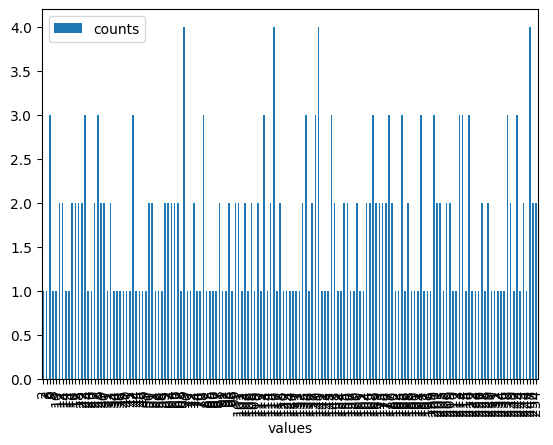

In [15]:
simulated_df.plot.bar(x='values', y='counts')

Now I apply the Kolmogorov-Smirnov goodness-of-fit test. (Admittedly I have not recently read up into exactly how the test is constructed.) The code I use is documented here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [16]:
frozen = uniform(loc=0, scale=255)

In [17]:
kstest(flattened, frozen.cdf)

KstestResult(statistic=0.03564644607843137, pvalue=0.8892033199197915, statistic_location=32.0, statistic_sign=-1)

Given the high p-value, we cannot reject the null hypothesis that the cicada sample was drawn from the uniform(0,255) distribution. (Note: in practice each draw would be rounded to an integer value.)

As a check, it would be helpful to draw 256 times from just primes < 256, or just fibonacci numbers < 256, or some other meaningful subset of the values between 0 and 255. Then we could check the p-value for the KS test against the uniform distribution. If the KS test is helpful in our number theoretic context, the p-value here should be much lower and allow us to reject the null hypothesis. I haven't done that yet.


Below are some more descriptive checks of the set of numbers.

In [18]:
results_df.mean()

values    131.627329
counts      1.590062
dtype: float64

In [19]:
results_df.var()

values    5479.760248
counts       0.643401
dtype: float64

In [20]:
in_order = pd.Series(flattened)

<Axes: >

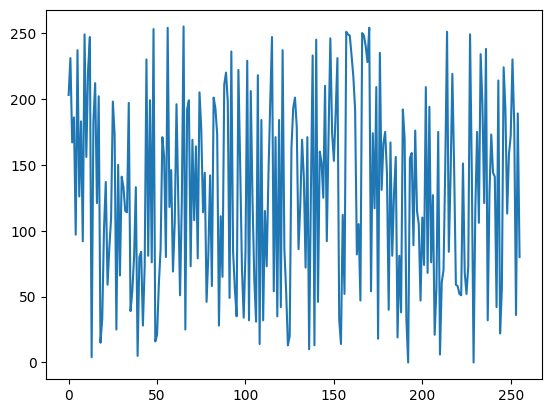

In [21]:
in_order.plot.line()

In [22]:
missing = set(np.arange(0, 256)) - set(flattened)

In [23]:
missing


{1,
 2,
 3,
 7,
 8,
 9,
 11,
 12,
 17,
 23,
 24,
 26,
 27,
 29,
 30,
 37,
 41,
 43,
 44,
 45,
 48,
 50,
 53,
 55,
 60,
 62,
 64,
 67,
 71,
 75,
 77,
 78,
 85,
 88,
 90,
 91,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 103,
 104,
 107,
 116,
 119,
 123,
 130,
 132,
 134,
 135,
 136,
 138,
 139,
 140,
 145,
 147,
 149,
 154,
 157,
 161,
 162,
 165,
 168,
 178,
 181,
 182,
 185,
 187,
 188,
 190,
 191,
 195,
 200,
 204,
 207,
 208,
 213,
 215,
 216,
 221,
 223,
 225,
 226,
 227,
 232,
 239,
 241,
 242,
 243,
 244,
 252}

In [24]:
len(missing)

95

In [25]:
len(set(flattened))

161

In [26]:
all_primes = list(primerange(256))

In [27]:
all_primes


[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251]

In [28]:
161 in all_primes

False

In [29]:
95 in all_primes

False

In [30]:
161 + 95

256

In [31]:
new_matrix.sum(axis=0)

array([4468., 4908., 3979., 3771., 4213., 3430., 4388., 3878.])

In [32]:
new_matrix.sum(axis=1)

array([1430., 1365.,  756.,  995.,  737.,  851.,  842., 1064., 1143.,
       1011.,  971., 1089., 1028.,  779., 1104.,  808., 1139.,  988.,
       1362., 1190., 1374., 1294., 1139.,  817.,  846.,  879.,  854.,
        880.,  878., 1229., 1035., 1158.])

In [33]:
col_sums = new_matrix.sum(axis=0)

In [34]:
row_sums=new_matrix.sum(axis=1)

In [35]:
for sum in row_sums:
    print(isprime(sum))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [36]:
for sum in col_sums:
    print(isprime(sum))

False
False
False
False
False
False
False
False


In [37]:
totient(256)

128